In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob as gb
import cv2
import os
import tensorflow as tf
from tensorflow.keras import layers , models
from tensorflow.keras.layers import  Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import keras

In [24]:
trainpath = '/kaggle/input/seat-belt2/Seat_Belt2/Train'
testpath  = '/kaggle/input/seat-belt2/Seat_Belt2/Test'

In [25]:
for folder in  os.listdir( trainpath) : 
    files = gb.glob(pathname= str( trainpath +'//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 3700 in folder Seat_Belt
For training data , found 3317 in folder WithoutSeat_Belt


In [26]:
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath +'//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 800 in folder Seat_Belt
For testing data , found 669 in folder WithoutSeat_Belt


In [27]:
code = {'Seat_Belt': 0, 'WithoutSeat_Belt': 1}

In [28]:
def get_code(n):
    for label, numeric_code in code.items():
        if n == numeric_code:
            return label

In [29]:
def preprocess_images(path, size):
    X = []
    y = []
    for folder in os.listdir(path):
        files = gb.glob(pathname=os.path.join(path, folder, '*.jpg'))
        for file in files:
            image = cv2.imread(file)
            image_array = cv2.resize(image, (size, size))
            X.append(list(image_array))
            y.append(code[folder])
    return np.array(X), np.array(y)

In [30]:
image_size =200

In [31]:
# Preprocess training and testing images
X_train, y_train = preprocess_images(trainpath, image_size)
X_test, y_test = preprocess_images(testpath, image_size)

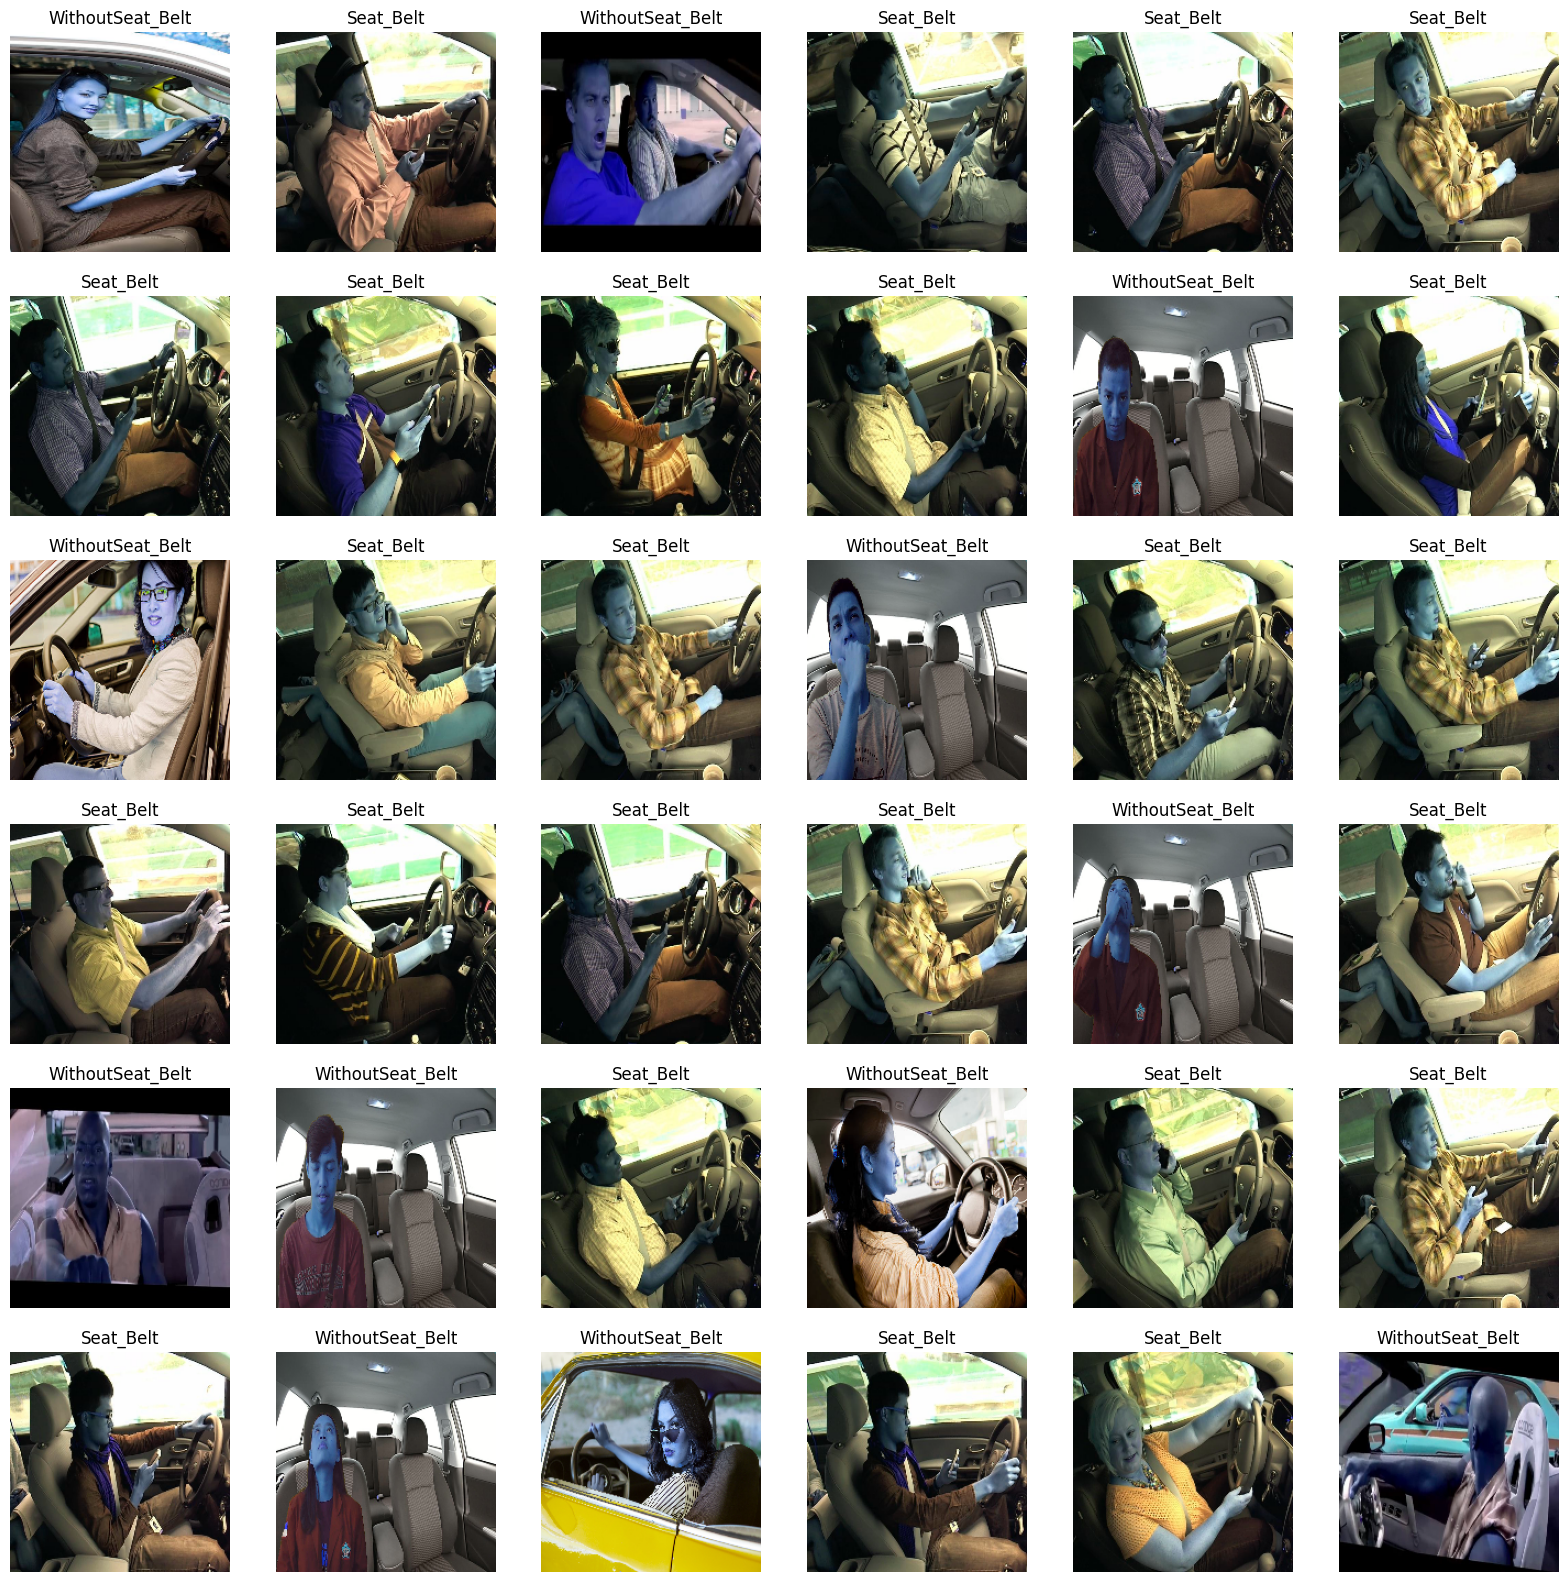

In [32]:
# Visualize random samples from the training dataset
plt.figure(figsize=(20, 20))
for n, i in enumerate(list(np.random.randint(0, len(X_train), 36))):
    plt.subplot(6, 6, n + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(get_code(y_train[i]))

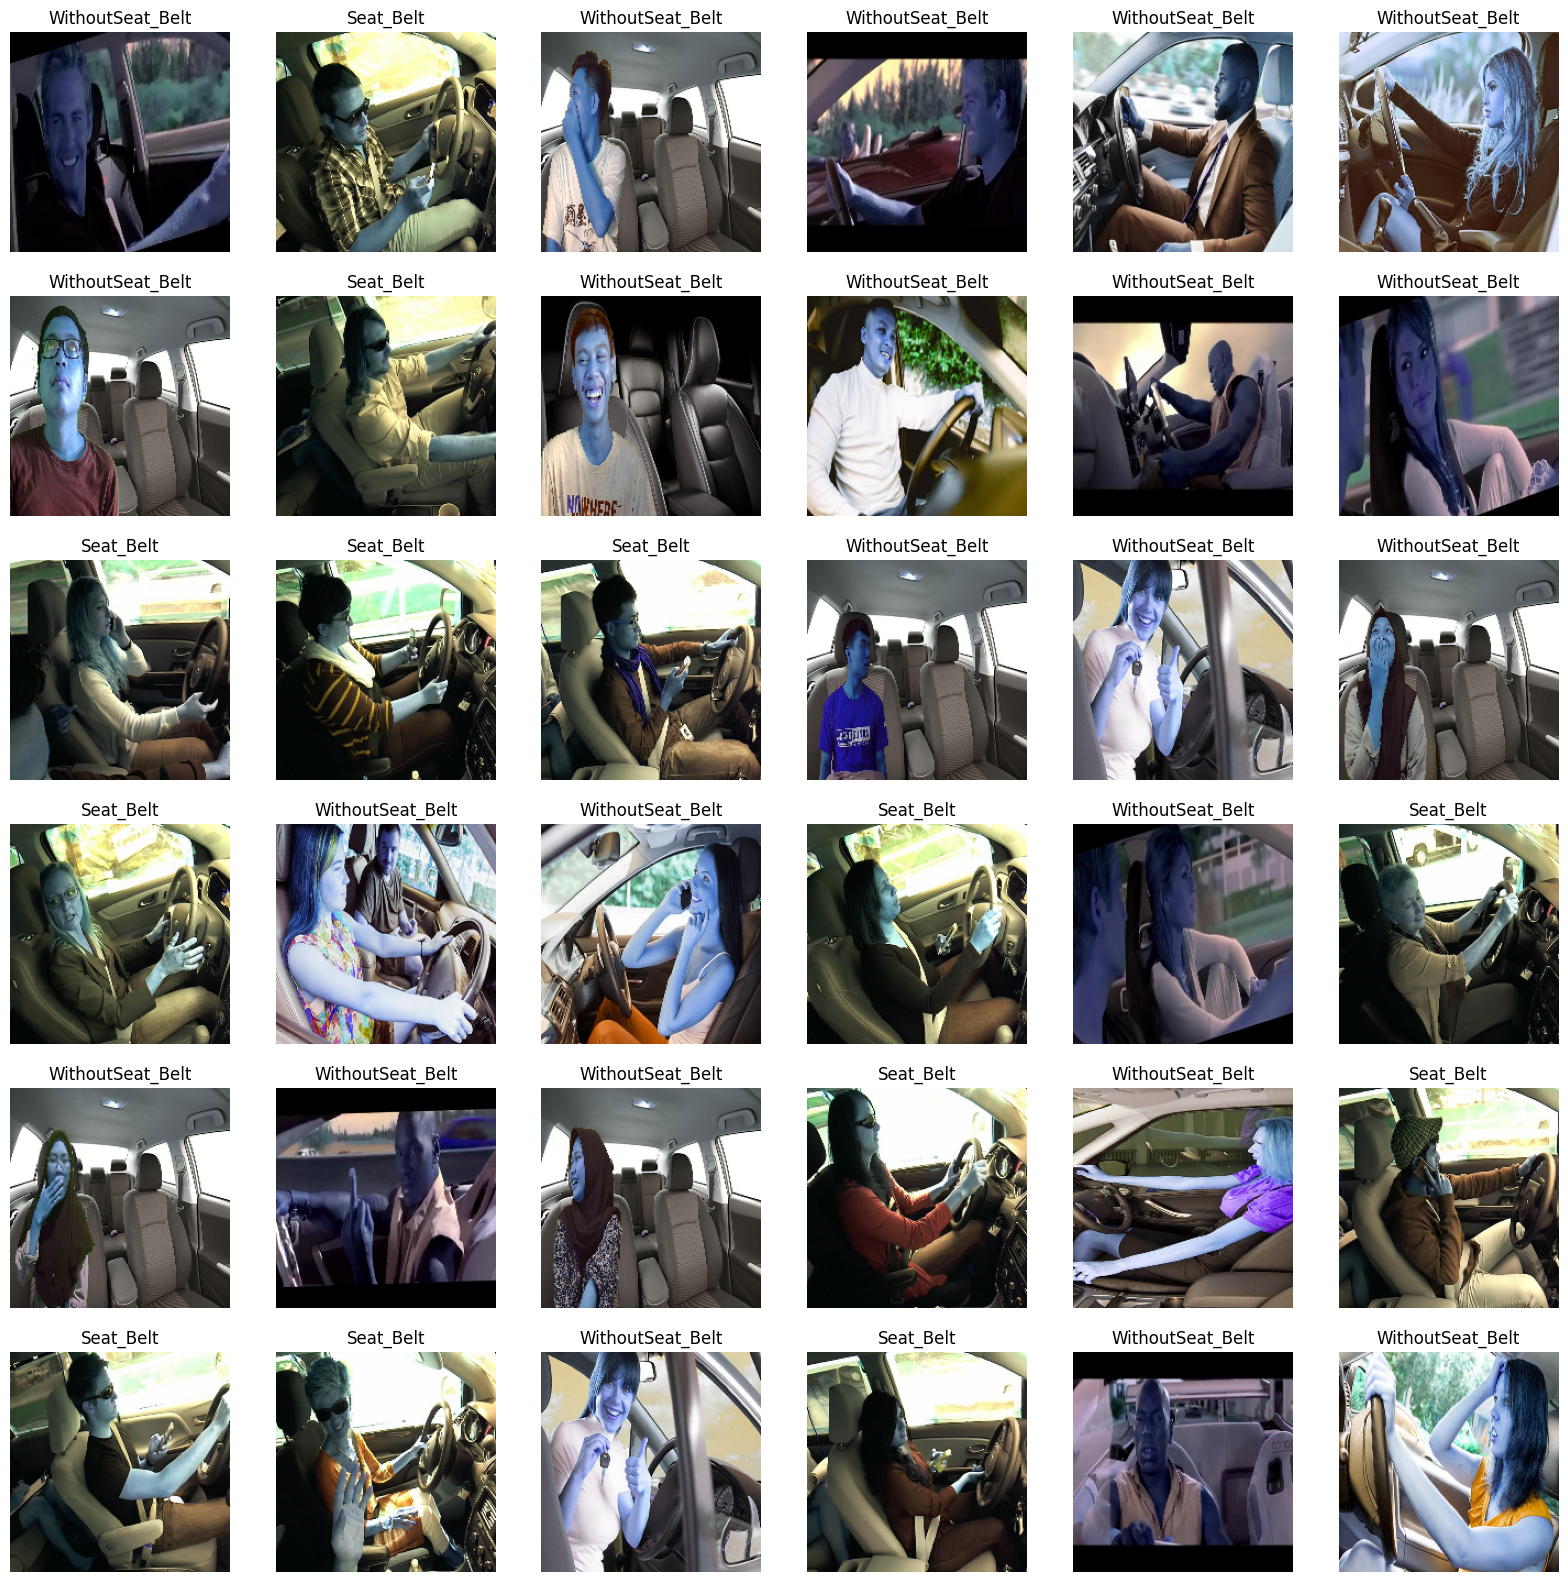

In [33]:
# Visualize random samples from the testing dataset
plt.figure(figsize=(20, 20))
for n, i in enumerate(list(np.random.randint(0, len(X_test), 36))):
    plt.subplot(6, 6, n + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(get_code(y_test[i]))

In [34]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(image_size,image_size,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 200)     5600      
                                                                 
 conv2d_6 (Conv2D)           (None, 196, 196, 150)     270150    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 150)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 120)       162120    
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 80)        86480     
                                                                 
 conv2d_9 (Conv2D)           (None, 43, 43, 50)        36050     
                                 

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [36]:
# Train the model with validation data
ThisModel = KerasModel.fit(X_train, y_train, epochs=5 ,batch_size=64,verbose=1 , validation_data=(X_temp,y_temp) )

Epoch 1/5
88/88 [==============================] - 128s 1s/step - loss: 0.7195 - accuracy: 0.9042 - val_loss: 0.0330 - val_accuracy: 0.9900
Epoch 2/5
88/88 [==============================] - 100s 1s/step - loss: 0.0533 - accuracy: 0.9854 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 3/5
88/88 [==============================] - 95s 1s/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 8.9239e-05 - val_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 95s 1s/step - loss: 0.0181 - accuracy: 0.9954 - val_loss: 0.0438 - val_accuracy: 0.9915
Epoch 5/5
88/88 [==============================] - 94s 1s/step - loss: 0.0334 - accuracy: 0.9923 - val_loss: 0.0011 - val_accuracy: 0.9993


In [37]:
# Evaluate the model on the test data
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

46/46 [==============================] - 5s 115ms/step - loss: 0.0545 - accuracy: 0.9918
Test Loss is 0.05448751151561737
Test Accuracy is 0.9918311834335327


In [38]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_train, y_train)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

176/176 [==============================] - 23s 133ms/step - loss: 0.0032 - accuracy: 0.9989
Test Loss is 0.0032348455861210823
Test Accuracy is 0.9989310503005981


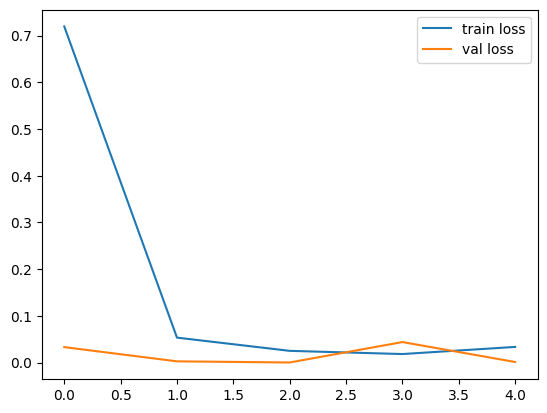

In [39]:
# Plot the training and validation loss
plt.plot(ThisModel.history['loss'], label='train loss')
plt.plot(ThisModel.history['val_loss'], label='val loss')
plt.legend()
plt.show()

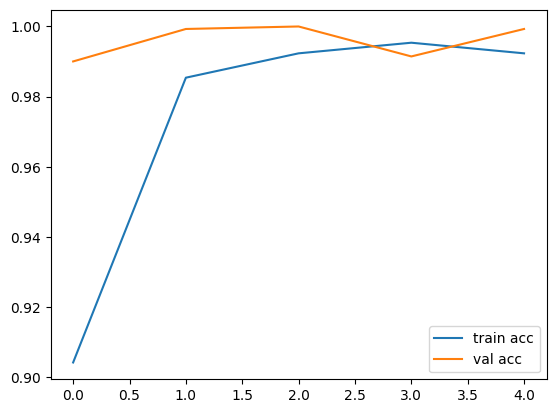

In [40]:
# Plot the training and validation accuracy
plt.plot(ThisModel.history['accuracy'], label='train acc')
plt.plot(ThisModel.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

46/46 [==============================] - 5s 115ms/step


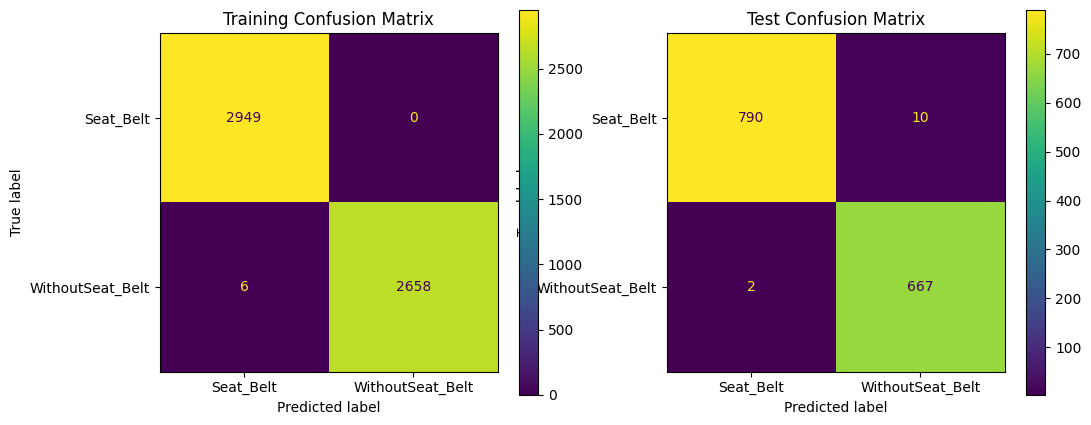

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the training and test data
train_preds = KerasModel.predict(X_train)
test_preds = KerasModel.predict(X_test)

# Calculate the confusion matrix for the training data
train_cm = confusion_matrix(y_train, np.argmax(train_preds, axis=1))

# Calculate the confusion matrix for the test data
test_cm = confusion_matrix(y_test, np.argmax(test_preds, axis=1))

# Create subplots for both confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the training confusion matrix
ConfusionMatrixDisplay(train_cm, display_labels=['Seat_Belt', 'WithoutSeat_Belt']).plot(cmap='viridis', ax=ax1)
ax1.set_title('Training Confusion Matrix')

# Plot the test confusion matrix
ConfusionMatrixDisplay(test_cm, display_labels=['Seat_Belt', 'WithoutSeat_Belt']).plot(cmap='viridis', ax=ax2)
ax2.set_title('Test Confusion Matrix')

plt.show()


In [42]:
from sklearn.metrics import classification_report
target_names = ['Seat_Belt', 'WithoutSeat_Belt']
print(classification_report(y_train, np.argmax(train_preds, axis=1), target_names=target_names))


                  precision    recall  f1-score   support

       Seat_Belt       1.00      1.00      1.00      2949
WithoutSeat_Belt       1.00      1.00      1.00      2664

        accuracy                           1.00      5613
       macro avg       1.00      1.00      1.00      5613
    weighted avg       1.00      1.00      1.00      5613



In [43]:
KerasModel.save("seatbelt_Model_2.h5")